## Project 6: Computing with Text
#### Archana Mohan

**Introduction:**
<br/>In this work, we focus on analyzing textual data, specifically the usage of words in a qualitative and quantitative lens. For this purposes, we utilize open source english literary texts available from the 'Project Gutenberg Library'. 
<br/>

In the *qualitative analysis* of words in the texts, bar charts are plotted based on the frequency of most used words. These charts are used to infer the nature of the text, including an estimate of its point of views and tenses. 
<br/>

When performing *quantitative analysis*, we look at all the words used instead of merely a few and examine the behavior of the frequency of word usage in texts. To attain results, the `logarithmic scale` plotting method is used. Because we're plotting on a wide range of values as frequency of words can range from somewhere in the 1000s to 1, log-scale is the more effective method. <br/>Log scale includes `the log-log plot` and `the semi-log plot`. 

*The log-log plot:*
As the name suggests, in log-log plots the logarithmic function of x and y values are plotted against each other. A straight line log-log plot (or an approximate) indicates that the data fits the form $y=kx^n$. The log-log plot of this will be of the form $\ln y =\ln k + n\ln x$, a straight line with slope $n$, the power of the original polynomial and y-intercept $\ln k$.
<br/>

*The semi-log plots:*
These are obtained by either plotting logarithm of x values against y or x values against logarithm of y. A data that is originally logarithmic in nature appears as a straight line in log(x)- y plots as we're plotting $\ln x$ against $\ln x$. An exponential data appears as a straight line in a x-log(y) plot: 
If $y = e^{x}$, then $\ln y = x. $

**The Project:**
<br/>
The *goal* of the project is to gain a constructive idea on how words are used in literary texts and examine the patterns they follow. The project is divided into three parts: Part 1 comprises functoin `count_words()` that helps obtain frequency data of words from a given text, part 2 includes the qualitative analysis, and part 3 has the quantitative analysis.

In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt

**PART 1**

This section consists of two functions `freq()` and `count_words()`. The first function is defined as a supplement for `count_words()`. `freq()` takes in a tuple and returns the second value in the tuple. This will be later utilized as a key to sort the words in descending order of frequency as frequencies appear as the second number in a tuple.

In [2]:
def freq(mytup):
    return mytup[1]

**count_words( ) function:**
<br/>When given the url of a website, this function returns a list of all words and their corresponding frequencies in the text of the url in the descending order of their frequencies. We use the `.get()` and `.text` functions from `requests` library to access the text. Before we extract the words themselves, we have to clean the text. Firstly, all punctuations are removed from the text, and then it is turnt to lowercase for cohesion. After extracting the words, we proceed to store the words coupled with their frequencies in the set `count`. `.keys()` helps us extract the words and their corresponding frequencies. Then, we sort them in descending order of frequency and return the sorted list of word-frequency tuples.

In [3]:
def count_words(url):
    
    '''This function returns a set of all words 
    and their frequencies in a text''' #docstring 
    
    text = requests.get(url).text #accessing the text from the url
    
    skip =".,;:()_-\"?!<>$&*#@\n\r[]{}%" #defining the punctuations to be removed
    for ch in skip:
        text = text.replace(ch," ") #replacing the punctuations with a space
    
    # apostrophe treated as special case
    text = text.replace('\'',"") #replacing it with nothing
    
    tclean =text.lower() #converting text to all lower case 
    twords = tclean.split() #producing the list of all words in the text
    
    count ={} #defining empty set to store words and frequencies 
    #define the loop to go through each word
    
    for word in twords:
        k =count.keys() #defining the dictionary of key and values 

        if word in k:
            count[word] +=1 #incrementing as the word reappears in text
        else:
            count[word] =1 #stops increment when the word doesn't reappear anymore
    
    count_sort =  sorted(count.items(), key =freq, reverse=True) #sorting the tuples in count in descending order
    
    return count_sort

Provided below is a demonstration of how `count_words()` works:

In [4]:
print(count_words("https://www.gutenberg.org/files/65088/65088-h/65088-h.htm")[:8])

[('class=', 2879), ('de', 1363), ('p', 1186), ('en', 1177), ('td', 1160), ('/p', 1155), ('/td', 1138), ('het', 1111)]


**PART 2**

In this section, we'll perform qualitative analysis of words in text using bar charts. Using the results from `count_words()` function for four open source texts - 'Around the World in 80 Days', 'The Republic', 'Little Women', and 'Gulliver's Travels', we'll plot the 20 most frequently appearing words in these texts as bar plots and infer the probable nature of these books. Words that hint at the point of views expressed in the works are highlighted a deep blue and those that speak of the tense are highlighted in magenta in the bar charts.

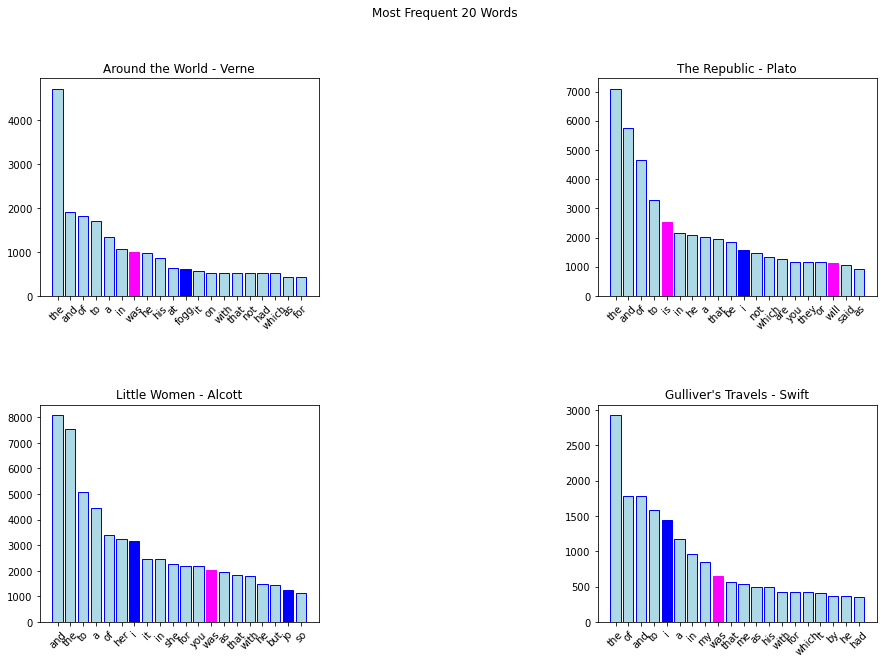

In [5]:
plt.figure(figsize=(15,10)) #resizing subplots 
plt.suptitle("Most Frequent 20 Words") 
plt.subplots_adjust(hspace=0.5,wspace=1) #adjusting plots

plt.subplot(2,2,1) #first subplot for Verne's work
#accessing the word-frequency list from count_words()
a = count_words("https://scassani.github.io/MTH337-S2021/_downloads/58e66eb33ff8fbf7872fbfb57be3f12c/around_world.txt")
atup = a[:20] #extracting the 20 most used words
xa,ya = zip(*atup) #assigning words for x and frequencies for y values, respectively
ap = plt.bar(xa,ya,color = 'lightblue', edgecolor = "blue") #adjusting display colors 
ap[10].set_color("blue") #highlighting specific results for later inference 
ap[6].set_color("magenta")
plt.xticks(rotation =45) #adjusting x axis tick value display
plt.title("Around the World - Verne") 

plt.subplot(2,2,2) #subplot for Plato's work
r = count_words("https://scassani.github.io/MTH337-S2021/_downloads/eab27d9178a30da5d59f566929d006f3/republic.txt")
rtup = r[:20]
xr,yr = zip(*rtup)
rp = plt.bar(xr,yr,color = 'lightblue', edgecolor = 'blue')
rp[10].set_color("blue")
rp[4].set_color("magenta")
rp[17].set_color("magenta")
plt.xticks(rotation =45)
plt.title("The Republic - Plato")


plt.subplot(2,2,3) #subplot for Alcott's work
l = count_words("https://scassani.github.io/MTH337-S2021/_downloads/42ab21da14ec897449a9ad044d08c0c9/little.txt")
ltup = l[:20]
xl,yl = zip(*ltup)
lp = plt.bar(xl,yl,color = 'lightblue', edgecolor = 'blue')
lp[6].set_color("blue")
lp[18].set_color("blue")
lp[12].set_color("magenta")
plt.xticks(rotation =45)
plt.title("Little Women - Alcott")


plt.subplot(2,2,4) #subplot for Swift's work
g = count_words("https://scassani.github.io/MTH337-S2021/_downloads/74af82a6b009f7e6692546a8bc09cbda/gulliver.txt")
gtup = g[:20]
xg,yg = zip(*gtup)
gp = plt.bar(xg,yg,color = 'lightblue', edgecolor = 'blue')
gp[4].set_color("blue")
gp[8].set_color("magenta")
plt.xticks(rotation =45)
plt.title("Gulliver's Travels - Swift")

plt.show()

The first person pronoun `I` appears frequently in all works mentioned except for Verne's. Hence, Verne's work is probably not written in the first person's point of view whereas others might have been written so. The other three works could be first person books or could perhaps be autobiographies. However, if we notice in the specific case of Alcott's *Little Women*, a name `Jo` is among the most frequent words. The `Jo` could be an important figure in the work, referenced numerous times. The contradiction of the first person `I` and the third person `Jo` standing together in the most frequent words implies that the *Little Women* also has the possibility of being a dialogue heavy work or something that switches point of views from the first to third person. This feature of a name (`Fogg`) appearing in the frequent words list is also a feature of Verne's book. `Fogg` could be the main character of the work.
<br/>
<br/>Next, we look at the tenses. In all the works but *The Republic*, the most recurring tense verb is `was`. These works have a heavy emphasis on the past. However, Plato's work liberally uses the `is` and `will`, focusing on present and future occurences.
<br/>It is also noted that the two words `the` and `and` appear in the top 3 of all the four works, alluding to the possibility of wide usage of these two words in english writings. 

**PART 3**

In the final section, we lay our focus on quantitatively examining the behavior of word usage in the four previously mentioned books. This is where we'll utilize logarithmic scale. To construct the log-log and semi-log plots, we define the function `logplot()` that will take in the x, y values required and an optional title. Then, it returns a subplot containing the original x-y graph, log(x)-y and x-log(y) semi plots, and log(x)-log(y) plot. 

In [6]:
def logplot(x,y,t=""):
    
    
    plt.figure(figsize=(15,5)) #resizing the plots
    plt.subplot(141)
    plt.plot(x,y)
    plt.title("x ; y") #plotting the x-y graph
    plt.subplot(142)
    plt.plot(np.log(x),y) #semi-plot log(x)-y
    plt.title("log-x ; y")
    plt.subplot(143)
    plt.plot(x,np.log(y)) #semi plot x-log(y)
    plt.title("x ; log-y")
    plt.subplot(144)
    plt.plot(np.log(x),np.log(y)) #plotting the log-log graph
    plt.title("log-x ; log-y")
    
    
    plt.suptitle(t) #assigning the title if entered
    
    
    
    return None

Next, we plot the corresponding logarithmic plots for all four books with the number of unique words as x-values and sorted frequencies as y-values.

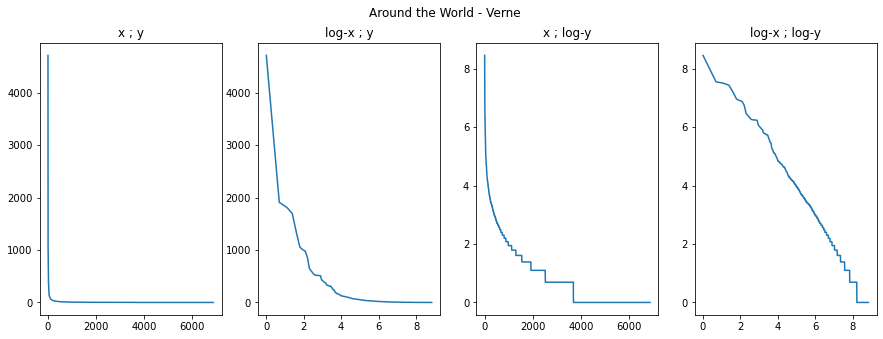

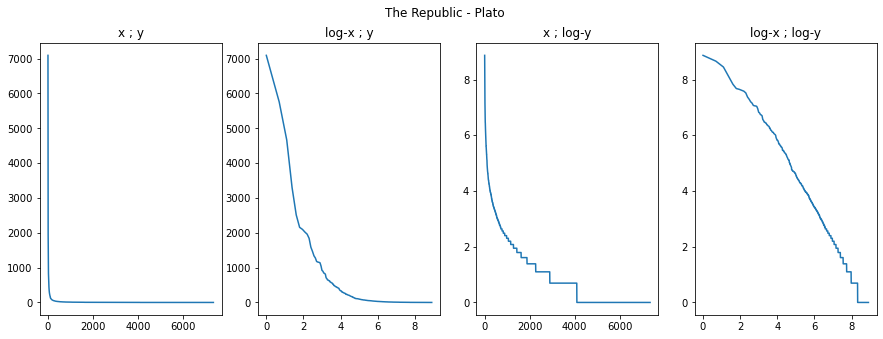

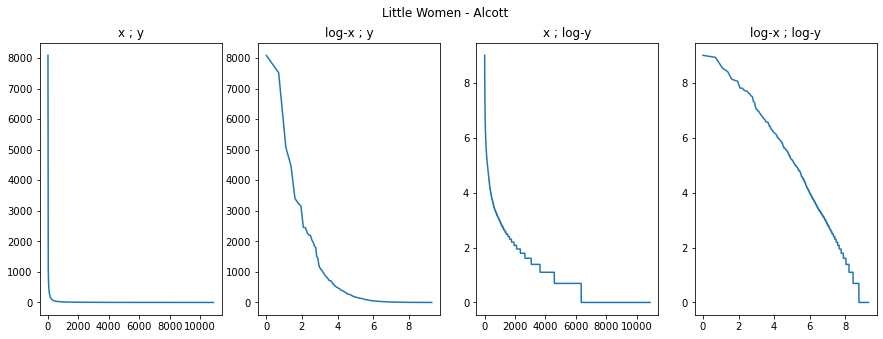

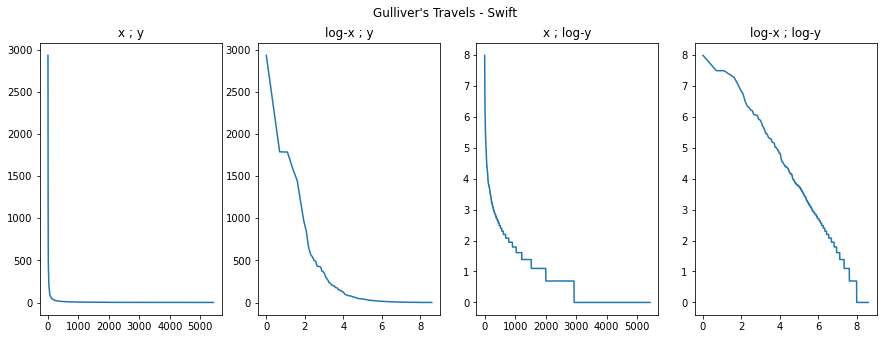

In [7]:
z1,y1 = zip(*a)
x1 = np.arange(1,len(a)+1)
logplot(x1,y1,t="Around the World - Verne")

z2,y2 = zip(*r)
x2 = np.arange(1,len(r)+1)
logplot(x2,y2, t = "The Republic - Plato")

z3,y3 = zip(*l)
x3 = np.arange(1,len(l)+1)
logplot(x3,y3, t = "Little Women - Alcott")

z4,y4 = zip(*g)
x4 = np.arange(1,len(g)+1)
logplot(x4,y4, t = "Gulliver's Travels - Swift")

It is noticed that for all four of the graphs the log-log plot produces an approximately downward-sloping straight line. This implies that our word-frequency datas from these texts fit best to a function of the form $y = kx^{-n}$. Since, $\ln y = \ln k - n\ln x$, we can find the degree of the function `-n` by figuring out the slope of the log-log line. Let's compare the above observations to the log plots of an arbitrary function $y = x^{-1}$ of the above mentioned form.

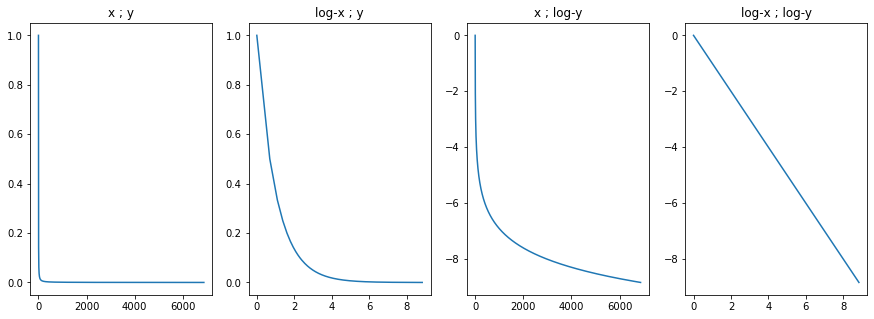

In [8]:
logplot(x1,1/x1)

Expectedly, the log-log plot produces the straight line. Now we'll figure out the slopes of the approximate straight lines produced from the four log-log plots. We define a function `slope()` that'll take in two points in a straight line (x1,y1) and (x2,y2) to return its slope. 
$$\text{Slope of a straight line = }\frac{y_2-y_1}{x_2-x_1}$$

In [9]:
def slope(x1,y1,x2,y2):

    slope = (y2-y1)/(x2-x1) #the equation for slope from two points 
    
    return slope

We grab two points from the log-log plots of each plots and determine the slope of these graphs for the corresponding books.

In [10]:
#storing the corresponding slope values of each plot

aws = slope(np.log(10),np.log(y3[10]),np.log(2500),np.log(y3[2500])) #slope of verne
rs = slope(np.log(15),np.log(y3[15]),np.log(5000),np.log(y3[5000])) #slope of plato
ls = slope(np.log(15),np.log(y3[15]),np.log(5500),np.log(y3[5500])) #slope of alcott
gs = slope(np.log(10),np.log(y4[1]),np.log(2500),np.log(y3[2500])) #slope of swift

#printing the slopes for latter reference
print(f"Slope of Verne: {aws}\nSlope of Plato: {rs}\nSlope of Alcott:{ls}\nSlope of Swift: {gs}")

Slope of Verne: -1.0698575645940613
Slope of Plato: -1.1716489198804096
Slope of Alcott:-1.1527360644467362
Slope of Swift: -1.0317077546456508


Using the slope values we have, the equation of the straight line that approximates the log-log plot can be calculated. We know from straight line geometry that if we have the slope ($m$) of a line and one point in the line ($(x_1,y_1)$), the equation of the line is given by $$y-y_1 = m(x-x_1)$$
Now, we plot the theoretical straight line obtained from the equation and the actual log-log plot of the data using pointers together to determine its accuracy.

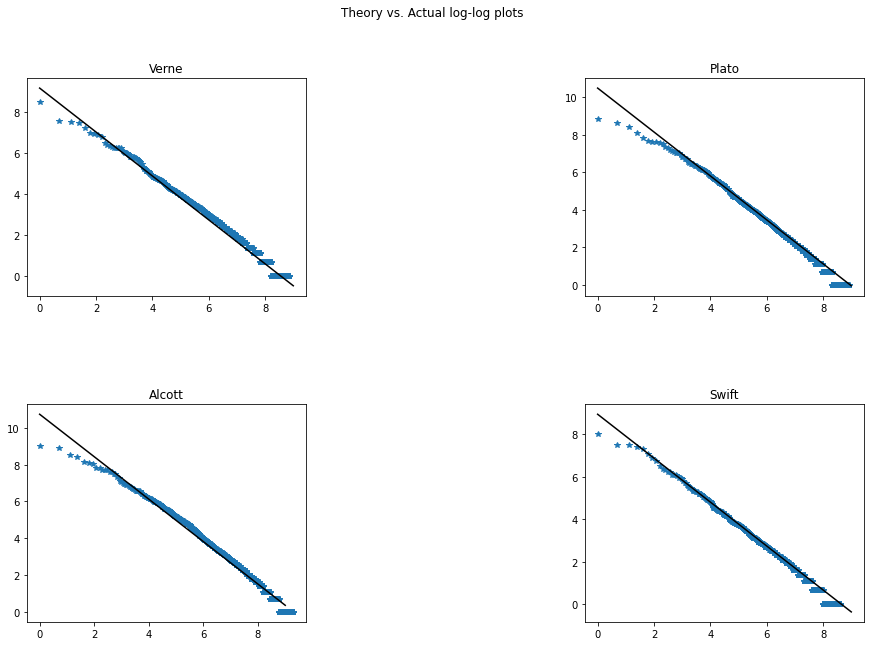

In [11]:
xc = np.linspace(0,9,100) #defining the range of x-values
plt.figure(figsize=(15,10)) #resizing subplots 
plt.suptitle("Theory vs. Actual log-log plots") 
plt.subplots_adjust(hspace=0.5,wspace=1) #adjusting plots

plt.subplot(221) #plotting for Verne data
yc1 = np.log(y1[50]) + aws*(xc - np.log(50)) #theoretical straight line
plt.plot(np.log(x1),np.log(y1),"*"); #actual log-log plot
plt.plot(xc,yc1,"k-");
plt.title("Verne")

plt.subplot(222) #plotting for Plato's data
yc2 = np.log(y2[50])  + rs*(xc - np.log(50))
plt.plot(np.log(x2),np.log(y2),"*");
plt.plot(xc,yc2,"k-");
plt.title("Plato")

plt.subplot(223) #plotting for Alcott's data
yc3 = np.log(y3[50]) + ls*(xc - np.log(50))
plt.plot(np.log(x3),np.log(y3),"*");
plt.plot(xc,yc3,"k-");
plt.title("Alcott")

plt.subplot(224) #plotting for Swift's data
yc4 = np.log(y4[50]) + gs*(xc - np.log(50))
plt.plot(np.log(x4),np.log(y4),"*");
plt.plot(xc,yc4,"k-");
plt.title("Swift")

plt.show()

We observe that for all the four plots there exists a close correspondence between the theoretical and actual log-log plots except for a few points at the extremes. This furthur confirms our previous conjecture that the frequency of words in text follows the function of the form $y = kx^{-n}$ where $-n$ is the slope of the log-log plot. So, Verne's texts are of $y = kx^{-1.07}$, Plato's work: $y = kx^{-1.17}$, Alcott's work: $y = kx^{-1.15}$,   and Swift's text: $y = kx^{-1.03}$. Coincidentally, all the texts produce plots of functions of powers close to -1.  

**Conclusion:**
<br/>The project `Computation with text` took a closer look at the pattern of word usage in four english literary works to make inferences. A qualitative look gave insights in the point of views presented by the books (appearance of first person in all except for Verne), nature of time utlized in the works (past tense in most except for Plato's), and widely used words that appeared in all four texts (the, and). In quantitative analysis, logarithmic scale was used to obtain the function that closely represents the behavior of words' frequency. All four texts follow functions of the nature $y = kx^{-n}$ as the log-log plot produces a straight line. We were able to figure out the value of $n$, all of them close to -1, by finding slope of the log-log line and then, checked for accuracy. 

****